# INTERACTING CASE

In [1]:
# executeme

using NBInclude
@nbinclude("Hofstadter Single Particle in Julia.ipynb")

Hofstadter_SP (generic function with 1 method)

In [2]:
using QuantumOptics

In [3]:
Nx = 4; Ny = 6; N=Nx*Ny; q = Ny; alpha=1/q
PN = 2
U = 2;

In [4]:
# executeme

function get_Bosonic_MB_Basis(N,PN)
   
    NBasis = NLevelBasis(N)
    NStates = bosonstates(NBasis, PN)
    
    NBasis_MB = ManyBodyBasis(NBasis, NStates)
    
    return NBasis_MB, NBasis
end

get_Bosonic_MB_Basis (generic function with 1 method)

In [5]:
basis_mb, basis = get_Bosonic_MB_Basis(N,PN)

(ManyBody(onebodybasis=NLevel(N=24), states:300), NLevel(N=24))

In [6]:
# executeme

function get_Kinetic_Part(N, MB_Basis, Sp_Op)
    KT = SparseOperator(MB_Basis)
    for m in 1:N
        for n in 1:N
            KT = KT + Sp_Op[m,n] * transition(MB_Basis, m, n)
        end
    end
    
    return KT
end

get_Kinetic_Part (generic function with 1 method)

In [7]:
basis2 = basis ⊗ basis

# interaction : at_i at_i a_i a_i = at_i a_i at_i a_i - at_i a_i = n_i n_i - n_i
    
Vint2 = SparseOperator(basis2)

for n in 1:N
    Vint2 += U/2*transition(basis,n,n)⊗transition(basis,n,n)
end

Vint_mb = manybodyoperator(basis_mb, Vint2)

Operator(dim=300x300)
  basis: ManyBody(onebodybasis=NLevel(N=24), states:300)sparse([1, 25, 48, 70, 91, 111, 130, 148, 165, 181  …  246, 256, 265, 273, 280, 286, 291, 295, 298, 300], [1, 25, 48, 70, 91, 111, 130, 148, 165, 181  …  246, 256, 265, 273, 280, 286, 291, 295, 298, 300], ComplexF64[2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im  …  2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im], 300, 300)

In [8]:
# executeme

function get_Int_Part(N, MB_Basis, U)
    IT = SparseOperator(MB_Basis)
    for m in 1:N
        IT = IT + U/2 * number(MB_Basis, m) * ( number(MB_Basis, m) - identityoperator(MB_Basis) ) 
    end
    
    return IT
end

get_Int_Part (generic function with 1 method)

In [9]:
Int_mb = get_Int_Part(N, basis_mb, U)

Operator(dim=300x300)
  basis: ManyBody(onebodybasis=NLevel(N=24), states:300)sparse([1, 25, 48, 70, 91, 111, 130, 148, 165, 181  …  246, 256, 265, 273, 280, 286, 291, 295, 298, 300], [1, 25, 48, 70, 91, 111, 130, 148, 165, 181  …  246, 256, 265, 273, 280, 286, 291, 295, 298, 300], ComplexF64[2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im  …  2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im], 300, 300)

In [10]:
# executeme

function Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis, Basis = get_Bosonic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Finite_U (generic function with 1 method)

1) If particle number=1 and U=0, Hofstadter Finite U energies has to be equal to Hofstadter Single Particle energies.

In [41]:
H_mb = Hofstadter_Finite_U(Nx, Ny, 1/q, PN, U)

Operator(dim=300x300)
  basis: ManyBody(onebodybasis=NLevel(N=24), states:300)sparse([1, 2, 4, 5, 21, 1, 3, 6, 22, 25  …  289, 293, 297, 298, 300, 90, 290, 294, 299, 300], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2  …  299, 299, 299, 299, 299, 300, 300, 300, 300, 300], ComplexF64[2.0 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.4142135623730951 + 0.0im  …  -1.0 + 0.0im, -0.49999999999999933 + 0.866025403784439im, -0.49999999999999933 - 0.866025403784439im, -0.7071067811865467 - 1.2247448713915896im, -0.7071067811865467 + 1.2247448713915896im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -0.7071067811865467 + 1.2247448713915896im, -0.7071067811865467 - 1.2247448713915896im, 2.0 + 0.0im], 300, 300)

In [42]:
eigenenergies(H_mb)

INFO: Defaulting to sparse diagonalization.
        If storing the full operator is possible, it might be faster to do
        eigenstates(dense(op)). Set info=false to turn off this message.


6-element Vector{ComplexF64}:
  -6.189546526310846 - 1.681181981339578e-18im
  -6.172051272414452 + 3.5632989292623006e-17im
  -6.106593512195771 - 8.033459600622996e-18im
  -6.106593512195758 + 1.493611163483624e-17im
  -6.089455627974625 + 3.11437278116496e-17im
 -6.0894556279745675 - 1.7113027254720113e-17im

In [43]:
eigenenergies(dense(Hofstadter_Finite_U(Nx,Ny,1/q,PN,U)))

300-element Vector{Float64}:
 -6.189546526310846
 -6.172051272414461
 -6.106593512195772
 -6.106593512195753
 -6.08945562797458
 -6.089455627974562
 -6.034423786568465
 -6.030892925681546
 -6.013868847522769
 -6.012398054183008
 -4.599466816455044
 -4.554664188283461
 -4.531321123644692
  ⋮
  5.016068480188707
  5.102876013597193
  6.175937388260237
  6.191605127143246
  6.365063702172781
  6.365063702172825
  6.399794017959993
  6.399794017960019
  6.45194590390373
  6.482373769780084
  6.498202684099704
  6.523791239602321

In [44]:
using LinearAlgebra
eigen(Hofstadter_SP(4, 4, 1/4, 0))

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
16-element Vector{Float64}:
 -2.8284271247461885
 -2.8284271247461876
 -2.8284271247461867
 -2.828427124746186
 -1.5885259206217286e-16
 -6.158601528183403e-17
  4.110075077717591e-17
  1.186225349076427e-16
  3.1086244689504383e-15
  3.1086244689504383e-15
  3.1086244689504383e-15
  4.884981308350689e-15
  2.8284271247461894
  2.8284271247461903
  2.8284271247461903
  2.8284271247461903
vectors:
16×16 Matrix{ComplexF64}:
  -0.0328925-0.277237im    …        -0.125+0.125im
  0.00332264-0.279204im                0.0+0.0im
   -0.249043-0.192656im             -0.125-0.125im
   -0.129583-0.242553im           0.353553+0.0im
 -0.00171222-0.197646im                0.0+0.0im
    0.187957-0.0518321im   …           0.0+0.0im
   -0.270744+0.0548745im               0.0+0.0im
  -0.0845807-0.216151im              -0.25-1.54074e-33im
   -0.136269-0.00925389im            0.125+0.125im
    0.275779-0.136432im                0.0+0.0i

In [45]:
function get_Fermionic_MB_Basis(N,PN)
    b_hard = NLevelBasis(N)
    states_hard = fermionstates(b_hard, [PN])
    b_mb_hard = ManyBodyBasis(b_hard, states_hard)
    
    return b_mb_hard
end

get_Fermionic_MB_Basis (generic function with 1 method)

In [46]:
function Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis = get_Fermionic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Hard_Core (generic function with 1 method)

If U>>1, Hofstadter Finite U energies converges at Hofstadter Hard Core energies.

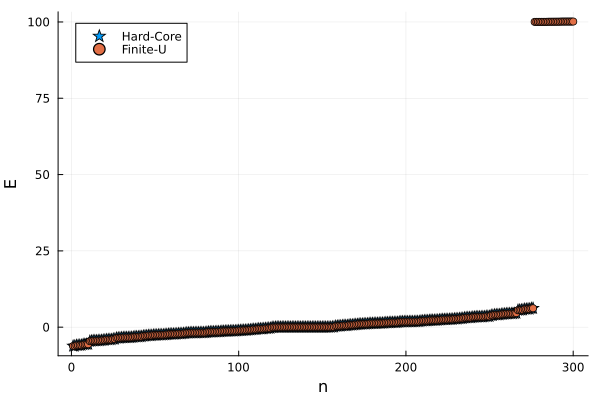

In [47]:
using Plots

U = 100

E1 = eigenenergies(dense(Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)))
E2 = eigenenergies(dense(Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)))

plot(1:length(E1), E1, seriestype=:scatter, markershape=:star5, markersize=6, label="Hard-Core")
plot!(1:length(E2), E2, seriestype=:scatter, label="Finite-U")

xlabel!("n");ylabel!("E")

# CHERN (INTERACTING CASE)

In [48]:
U = 2
E = eigenenergies(dense(Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)))
#plot(1:length(E), E, seriestype=:scatter, markershape=:star5, markersize=6)

300-element Vector{Float64}:
 -6.189546526310846
 -6.172051272414461
 -6.106593512195772
 -6.106593512195753
 -6.08945562797458
 -6.089455627974562
 -6.034423786568465
 -6.030892925681546
 -6.013868847522769
 -6.012398054183008
 -4.599466816455044
 -4.554664188283461
 -4.531321123644692
  ⋮
  5.016068480188707
  5.102876013597193
  6.175937388260237
  6.191605127143246
  6.365063702172781
  6.365063702172825
  6.399794017959993
  6.399794017960019
  6.45194590390373
  6.482373769780084
  6.498202684099704
  6.523791239602321

In [49]:
@nbinclude("Hofstadter Single Particle in Theta Space.ipynb")

Nx=4; Ny=6; N=Nx*Ny; q=Ny; PN=2; U=2; TSize=5
n1 = 1
n2 = 2

function Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx, Ty, PN, U)
    
    N = Nx*Ny
    
    MB_Basis, Basis = get_Bosonic_MB_Basis(N,PN)
    
    Sp_Op = HSP_T(Nx, Ny, alpha, Tx, Ty, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

# Twist Angle Parameter Space #
dx=2*pi/TSize
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy))
# ---- #

# Link Variable and Berry Curvature #
Sum=0
for tx in range(start=1, stop=length(Tx))
    for ty in range(start=1, stop=length(Ty))
        
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx], Ty[ty], PN, U)
        w1, v1 = eigen(dense(H_mb).data)
        i = sortperm(w1, by=real);w1 = w1[i];v1 = v1[:,i]
        v1 = v1[:,n1:n2]  
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty], PN, U)
        w2, v2 = eigen(dense(H_mb).data)
        i = sortperm(w2, by=real);w2 = w2[i];v2 = v2[:,i]
        v2 = v2[:,n1:n2]
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx], Ty[ty]+dy, PN, U)
        w3, v3 = eigen(dense(H_mb).data)
        i = sortperm(w3, by=real);w3 = w3[i];v3 = v3[:,i]
        v3 = v3[:,n1:n2]
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty]+dy, PN, U)
        w4, v4 = eigen(dense(H_mb).data)
        i = sortperm(w4, by=real);w4 = w4[i];v4 = v4[:,i]
        v4 = v4[:,n1:n2]
        #----------LINK VARIABLES------------
        U1=det(adjoint(v1)*v2)
        U1=U1/abs(U1)
        U2=det(adjoint(v2)*v4)
        U2=U2/abs(U2)
        U3=det(adjoint(v3)*v4)
        U3=U3/abs(U3)
        U4=det(adjoint(v1)*v3)
        U4=U4/abs(U4)
        #----------BERRY CURVATURE-----------
        F=log(U1*U2*1/U3*1/U4)
        Sum=Sum+F 
    end
end
# ---- #

print("Chern Number is: ", 1/(2*pi*1im)*Sum)

Chern Number is: 0.9999999999999999 - 2.5676352897231383e-17im